In [1]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline 

plt.rcParams["font.family"]='serif'
plt.rcParams["figure.figsize"][0] = 10
plt.rcParams["figure.figsize"][1] = 7
plt.rcParams['errorbar.capsize']=2

### Teil 1: Bestimmung der Zeitkonstante eines RC-Glieds

In [2]:
#Spannungsmessung:
#1.Messungd
C1=470e-9 #Farad
C1_err=0.1*C1 

R1=1e3 #Ohm
R1_err=0.05*R1

T_hw1=320e-6 #s
T_hw1_err=3e-6 #s

#2. Messung
C2=4.7e-9 
C2_err=0.1*C2

R2=10e3
R2_err=0.05*R2

T_hw2=31.4e-6
T_hw2_err=0.3e-6/3

#3. Messung
C3=47e-9
C3_err=0.1*C3

R3=R1
R3_err=R1_err

T_hw3=34.8e-6
T_hw3_err=T_hw2_err

In [3]:
#Strommessung:
C4=47e-9
C4_err=0.1*C4

R4=R1
R4_err=R1_err

T_hw4=38e-6
T_hw4_err=T_hw2_err


In [4]:
#Theoretische Werte

tau_theo1= R1*C1 
#Fehler aus Fehlerfortpflanzung
tau_theo1_err=np.sqrt((C1*R1_err)**2+(R1*C1_err)**2)

tau_theo2= R2*C2 
tau_theo2_err=np.sqrt((C2*R2_err)**2+(R2*C2_err)**2)

tau_theo3= R3*C3 
tau_theo3_err=np.sqrt((C3*R3_err)**2+(R3*C3_err)**2)

print('Für die theoretischen Werte wurde ermittelt:')
print('tau_theo1 = ',tau_theo1,' +/- ',tau_theo1_err)
print('tau_theo2 = ',tau_theo2,' +/- ',tau_theo2_err)
print('tau_theo3 = ',tau_theo3,' +/- ',tau_theo3_err)

Für die theoretischen Werte wurde ermittelt:
tau_theo1 =  0.00047  +/-  5.254759747124506e-05
tau_theo2 =  4.7e-05  +/-  5.254759747124505e-06
tau_theo3 =  4.7e-05  +/-  5.254759747124505e-06


In [5]:
#Experimentelle Werte für Tau=T_hw/ln(2) 

tau_exp1=T_hw1/np.log(2)
#Fehler aus Fehlerfortpflanzung
tau_exp1_err=T_hw1_err/np.log(2)

tau_exp2=T_hw2/np.log(2)
tau_exp2_err=T_hw2_err/np.log(2)

tau_exp3=T_hw3/np.log(2)
tau_exp3_err=T_hw3_err/np.log(2)

print('Für die experimentellen Werte wurde ermittelt:')
print('tau_exp1 = ',tau_exp1,' +/- ',tau_exp1_err)
print('tau_exp2 = ',tau_exp2,' +/- ',tau_exp2_err)
print('tau_exp3 = ',tau_exp3,' +/- ',tau_exp3_err)

Für die experimentellen Werte wurde ermittelt:
tau_exp1 =  0.0004616624130844683  +/-  4.32808512266689e-06
tau_exp2 =  4.530062428391345e-05  +/-  1.4426950408889633e-07
tau_exp3 =  5.020578742293593e-05  +/-  1.4426950408889633e-07


In [6]:
#Vergleich der experimentellen und theoretischen Werte 
diff_tau1=np.abs(tau_theo1-tau_exp1)
diff_tau1_err=np.sqrt((tau_theo1_err)**2+(tau_exp1_err)**2)

diff_tau2=np.abs(tau_theo2-tau_exp2)
diff_tau2_err=np.sqrt((tau_theo2_err)**2+(tau_exp2_err)**2)

diff_tau3=np.abs(tau_theo3-tau_exp3)
diff_tau3_err=np.sqrt((tau_theo3_err)**2+(tau_exp3_err)**2)

print('Der Vergleich der theoretischen und experimentellen Werte liefert:')
print('∆(tau1) = ',diff_tau1,' +/- ',diff_tau1_err,' => Sigma= ',diff_tau1/diff_tau1_err)
print('∆(tau2) = ',diff_tau2,' +/- ',diff_tau2_err,' => Sigma= ',diff_tau2/diff_tau2_err)
print('∆(tau3) = ',diff_tau3,' +/- ',diff_tau3_err,' => Sigma= ',diff_tau3/diff_tau3_err)

Der Vergleich der theoretischen und experimentellen Werte liefert:
∆(tau1) =  8.337586915531663e-06  +/-  5.272553765329521e-05  => Sigma=  0.15813185197573013
∆(tau2) =  1.6993757160865504e-06  +/-  5.256739834708396e-06  => Sigma=  0.3232755984738246
∆(tau3) =  3.205787422935931e-06  +/-  5.256739834708396e-06  => Sigma=  0.6098432723965621


In [7]:
#Zum Vergleich: Werte aus der Strommessung
tau_theo4=R4*C4
tau_theo4_err=np.sqrt((C4*R4_err)**2+(R4*C4_err)**2)

tau_exp4=T_hw4/np.log(2)
tau_exp4_err=T_hw4_err/np.log(2)

print('Aus der Strommessung ergeben sich die folgenden Werte:')
print('tau_theo_I = ' + str(tau_theo4) + ' +/- ' + str(tau_theo4_err))
print('tau_exp_I = ' + str(tau_exp4) + ' +/- ' + str(tau_exp4_err))
print()

diff_tau4=np.abs(tau_theo4-tau_exp4)
diff_tau4_err=np.sqrt((tau_theo4_err)**2+(tau_exp4_err)**2)

print('Für die Differenz Theorie-Experiment bei der Strommessung folgt somit:')
print('∆(tau4) = ' + str(diff_tau4) + ' +/- ' + str(diff_tau4_err)+' => Sigma= '+str(diff_tau4/diff_tau4_err))

Aus der Strommessung ergeben sich die folgenden Werte:
tau_theo_I = 4.7e-05 +/- 5.254759747124505e-06
tau_exp_I = 5.4822411553780616e-05 +/- 1.4426950408889633e-07

Für die Differenz Theorie-Experiment bei der Strommessung folgt somit:
∆(tau4) = 7.822411553780619e-06 +/- 5.256739834708396e-06 => Sigma= 1.4880727979216317


### Teil 3: Frequenz- und Phasengang eines RC-Glieds

In [8]:
#Bestimmung der Grenzfrequenzen am Circuit Analyzer

#Tiefpass
freq_grenz_tp=2.99*1e3 #Hz
freq_grenz_tp_err=0.11*1e3

#Hochpass
freq_grenz_hp=3.03*1e3
freq_grenz_hp_err=freq_grenz_tp_err

#### Phasengang am Hochpass

[2840.00947614]
Der Fit liefert eine Grenzfrequenz von freq_g =  2840.00947614125  +/-  65.94691431278557
[2840.00947614] [45.]


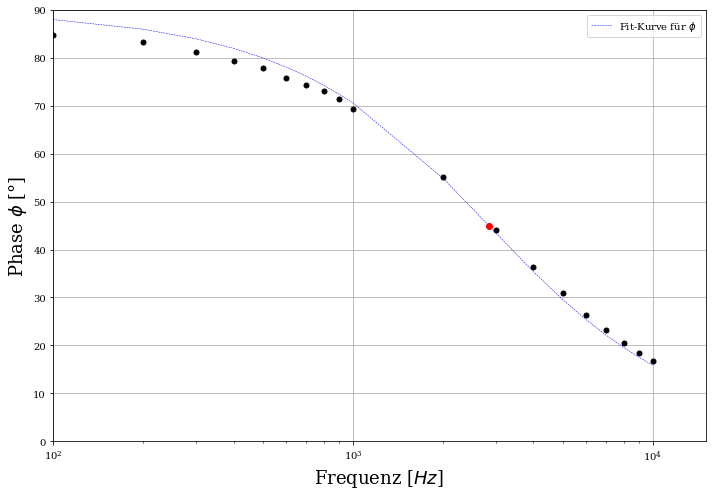

In [9]:
#Frequenzen 
freq=np.concatenate((np.arange(100,1000,100), np.arange(1000,11000,1000)),axis=0)
#print(freq)
#Phasenunterschiede ∆t mit Fehler
#delta_t=1e-6*np.array([200.0,79.0,47,28.0,18.0,13.8,10.0,7.0,6.0,5.1])
#delta_t_err=1e-6*np.array([42,4.2,4.2,1.1,1.3,1.1,0.7,0.6,0.4,0.4])

#Phase umgerechnet in Winkel 
phi= np.array([84.7, 83.3, 81.2, 79.4, 77.8, 75.8, 74.4, 73.1, 71.4, 69.4, 55.2, 44.1, 36.4, 31.0, 26.4, 23.2, 20.5, 18.4, 16.7])
#phi_err=phi*np.sqrt((delta_t_err/delta_t)**2)

#Fitfunktion
def function(freq,freq_grenz):
    return np.arctan(freq_grenz/freq)*(360/(2*np.pi))

plt.plot(freq, phi, marker='o',markersize=5, color='black',linewidth=1,linestyle=' ')
plt.xscale('log')
#plt.errorbar(freq,phi,yerr=phi_err,linewidth=1,linestyle='',color='darkred',label='Messwerte mit Fehler')
plt.xlabel('Frequenz ['+'$Hz$]', size=18)
plt.ylabel('Phase'+ ' '+r'$\phi$'+ r' [°]' , size=18)
#plt.title(r'Diagramm 22: Phasenverschiebung $\phi$ beim Hochpass ', size=20)
plt.grid()
plt.xlim(100,15000)
plt.ylim(0,90)
#plt.xticks( [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000],
       #     [1,2,3,4,5,6,7,8,9,10])

#Fitten an die Daten

popt,pcov=curve_fit(function,freq,phi)
plt.plot(freq,function(freq,popt[0]),linewidth=0.5,color='blue',linestyle='--',label=r'Fit-Kurve für $\phi$')
plt.legend(frameon=True)
print(popt)
freq_g=popt[0]
freq_g_err=pcov[0,0]**0.5
plt.tight_layout()
plt.xscale('log')
func = lambda x: function(x, * popt) -45
#plt.plot(45)
snp = fsolve(func, 2*10^3)
plt.plot(snp, function(snp, *popt), 'o', color='red')
plt.savefig('V241Diagramm22.pdf', format='PDF')
print('Der Fit liefert eine Grenzfrequenz von freq_g = ',freq_g,' +/- ',freq_g_err)
print(snp, function(snp, *popt))

In [10]:
diff_freq_g=np.abs(freq_g-freq_grenz_hp)
diff_freq_g_err=np.sqrt((freq_g_err)**2+(freq_grenz_hp_err)**2)

print('Differenz Theorie-Experiment:')
print('∆(freq_g) = ',diff_freq_g,' +/- ',diff_freq_g_err,' => Sigma= ',round(diff_freq_g/diff_freq_g_err,3))

Differenz Theorie-Experiment:
∆(freq_g) =  189.99052385874984  +/-  128.25363740408255  => Sigma=  1.481


In [11]:
#Vergleich der gemessen Grenzfrequenzen mit den Theoriewerten
freq_g_theo=1/(2*np.pi*R1*C3)
freq_g_theo_err=freq_g_theo*((R1_err/R1)**2+(C3_err/C3)**2)**0.5
print(freq_g_theo,freq_g_theo_err)
diff_freq_g_hp=np.abs(freq_g_theo-freq_grenz_hp)
diff_freq_g_hp_err=np.sqrt((freq_g_theo_err)**2+(freq_grenz_hp_err)**2)

diff_freq_g_tp=np.abs(freq_g_theo-freq_grenz_tp)
diff_freq_g_tp_err=np.sqrt((freq_g_theo_err)**2+(freq_grenz_tp_err)**2)

diff_freq_g=np.abs(freq_g-freq_g_theo)
diff_freq_g_err=np.sqrt((freq_g_err)**2+(freq_g_theo_err)**2)

print('Differenz Theorie-Experiment:')
print('∆(freq_g) = ',diff_freq_g,' +/- ',diff_freq_g_err,' => Sigma= ',round(diff_freq_g/diff_freq_g_err,3))
print()
print('Differenz Theorie-Experiment (Hochpass):')
print('∆(freq_g_hp) = ',diff_freq_g_hp,' +/- ',diff_freq_g_hp_err,' => Sigma= ',round(diff_freq_g_hp/diff_freq_g_hp_err,3))
print()
print(freq_g_theo, freq_g_theo_err)
print('Differenz Theorie-Experiment (Tiefpass):')
print('∆(freq_g_tp) = ',diff_freq_g_tp,' +/- ',diff_freq_g_tp_err,' => Sigma= ',round(diff_freq_g_tp/diff_freq_g_tp_err,3))

3386.2753849339438 378.5970975623283
Differenz Theorie-Experiment:
∆(freq_g) =  546.2659087926936  +/-  384.2977462723363  => Sigma=  1.421

Differenz Theorie-Experiment (Hochpass):
∆(freq_g_hp) =  356.27538493394377  +/-  394.25342393265163  => Sigma=  0.904

3386.2753849339438 378.5970975623283
Differenz Theorie-Experiment (Tiefpass):
∆(freq_g_tp) =  396.27538493394377  +/-  394.25342393265163  => Sigma=  1.005


### Teil 4: Frequenzgang eines Serienschwingkreises

#### Bestimmung der Induktivität L_1

In [12]:
omega_res=2*np.pi*np.array([3.92242946e3,3.84e3,3.80e3])
omega_res_err=2*np.pi*np.array([0.06e3,0.04e3,0.04e3])

omega_res_mean=np.mean(omega_res)
omega_res_mean_err=1/3*np.sum(omega_res_err**2)**0.5
omega_res_mean_std=np.std(omega_res)/np.sqrt(len(omega_res))

print('Grenzfrequenz:')
print(omega_res_mean,' +/- ',omega_res_mean_err,' +/- ',omega_res_mean_std,' s^-1')

Grenzfrequenz:
24216.2956327908  +/-  172.7082445788692  +/-  184.90709117822195  s^-1


In [13]:
#Wir wissen omega_res=sqrt(1/(L*C)). Daraus folgt:

L1=1/(omega_res_mean**2*C3)
L1_err=L1*np.sqrt((2*omega_res_mean_err/omega_res_mean)**2+(C3_err/C3)**2)
L1_std=L1*np.sqrt((2*omega_res_mean_std/omega_res_mean)**2)

print('Induktivität:')
print('L1 = ',L1,' +/- ',L1_err,' +/- ',L1_std,' H')
print('L1 = ',round(L1*1000,0),' +/- ',round((L1_err+L1_std)*1000,1),' mH')


Induktivität:
L1 =  0.03628162434269768  +/-  0.0036648851767837557  +/-  0.0005540673703491661  H
L1 =  36.0  +/-  4.2  mH


#### Bestimmung des Verlustwiederstandes R_v

In [14]:
#Aus Anleitung: ∆omega=(R+Rv)/L1

delta_omega=2*np.pi*np.array([5.44e3,1.39e3,0.65e3])
delta_omega_err=2*np.pi*np.array([0.11e3,0.06e3,0.04e3])
print(delta_omega*L1_err)
print(L1_err)
print(delta_omega)
R=np.array([1000,220,47])
R_err=0.05*R

R_v=delta_omega*L1-R
R_v_err=np.sqrt((delta_omega_err*L1)**2+(delta_omega*L1_err)**2+(R_err)**2)

R_ges=R+R_v
R_ges_err=np.sqrt(R_err**2+R_v_err**2)

print('Verlustwiderstand des jeweiligen Schwingkreises:')
print('Rv = ',R_v,' Ohm')
print(' +/- ',R_v_err,' Ohm')
print()
print('Jeweiliger Gesamtwiderstand R + Rv:')
print('R + Rv = ',R_ges,' Ohm')
print(' +/-     ',R_ges_err,' Ohm')

[125.26771066  32.00774225  14.96764925]
0.0036648851767837557
[34180.52807106  8733.62757698  4084.07044967]
Verlustwiderstand des jeweiligen Schwingkreises:
Rv =  [240.12507931  96.8701949  101.17670984]  Ohm
 +/-  [137.18895017  36.5045086   17.68336178]  Ohm

Jeweiliger Gesamtwiderstand R + Rv:
R + Rv =  [1240.12507931  316.8701949   148.17670984]  Ohm
 +/-      [146.01646499  38.12583308  17.83882798]  Ohm


#### Verlustwiderstand aus der Spannungsmessung

In [15]:

U_E=np.array([0.97,0.94,0.91])
U_E_err=0.01*np.ones(3)

U_A=np.array([0.6576,0.5374,0.2616])
U_A_err=0.01*np.ones(3)

R_v2=R*(U_E/U_A-1)
R_v2_err=np.sqrt((R_err*(U_E/U_A-1))**2+(R*U_E_err/U_A)**2+(R*U_E*U_A_err/U_A**2)**2)

R_ges2=R+R_v2
R_ges2_err=np.sqrt(R_err**2+R_v2_err**2)

print('Aus der Spannungsmessung folgt für den jew. Verlustwiderstand: ')
print('Rv = ',R_v2,' Ohm')
print(' +/- ',R_v2_err,' Ohm')
print()
print('Für den Gesamtwiderstand folgt somit:')
print('R + Rv = ',R_ges2,' Ohm')
print(' +/-     ',R_ges2_err,' Ohm')

Aus der Spannungsmessung folgt für den jew. Verlustwiderstand: 
Rv =  [475.06082725 164.81577968 116.49388379]  Ohm
 +/-  [36.03613053 11.65955569  8.730094  ]  Ohm

Für den Gesamtwiderstand folgt somit:
R + Rv =  [1475.06082725  384.81577968  163.49388379]  Ohm
 +/-      [61.63280542 16.0295115   9.04085401]  Ohm


### Teil 5: Bestimmung der Dämpfungskonstanten eines freien, gedämpften Schwingkreises

#### Bestimmung der Induktivität der Spule

In [16]:
#Resonanzfrequenz aus Aufgabe 4
L1_2=1/(omega_res[2]**2*C3)
L1_2_err=L1_2*np.sqrt((2*omega_res_err[2]/omega_res[2])**2+(C3_err/C3)**2)

print('Induktivität der Spule:')
print('L1 = ',L1_2,' +/- ',L1_2_err,' H')

Induktivität der Spule:
L1 =  0.03732288546971245  +/-  0.0038141018517742417  H


#### Logarithmisches Dekrement

In [17]:
A=np.array([3.05,1.92,1.22,0.80,0.52]) #Volt
A_err=np.array([0.06,0.06,0.06,0.06,0.05])

Lambda=[]
Lambda_err=[]
for i in range(4):
    Lambda.append(np.log(A[i]/A[i+1]))
    Lambda_err.append(np.sqrt((A_err[0]/A[i])**2+(A_err[0]/A[i+1])**2))

Lambda_err=np.array(Lambda_err)
Lambda_mean=np.mean(Lambda)
Lambda_mean_err=1/4*np.sum(Lambda_err**2)**0.5
Lambda_mean_std=np.std(Lambda)#/np.sqrt(len(Lambda))
print('Logarithmische Dekrement:')
print('Lambda = ',Lambda_mean,' +/- ',Lambda_mean_err,' +/- ',Lambda_mean_std)
print('=',Lambda_mean,' +/- ',Lambda_mean_err+Lambda_mean_std )

Logarithmische Dekrement:
Lambda =  0.4422670145064961  +/-  0.044540105880765846  +/-  0.01651320910483007
= 0.4422670145064961  +/-  0.061053314985595915


#### Gesamtwiderstand

In [18]:
#nach Anleitung Lambda=delta*T und delta=R_ges/(2L) also R_ges=2L*Lambda/T
T=1.69e-3/6
T_err=0.03e-3/6
R_ges3=2*L1_2*Lambda_mean/T
R_ges3_err=R_ges3*np.sqrt((L1_2_err/L1_2)**2+(Lambda_mean_err/Lambda_mean)**2+(T_err/T)**2)
R_ges3_std=R_ges3*np.sqrt((Lambda_mean_std/Lambda_mean)**2)

print('Gesamtwiderstand:')
print('R_ges = ',R_ges3,' +/- ',R_ges3_err,' +/- ',R_ges3_std)
print('=',R_ges3,' +/- ',R_ges3_err+R_ges3_std )
print(T, T_err)

Gesamtwiderstand:
R_ges =  117.20720328608951  +/-  16.944674530449028  +/-  4.376241033067352
= 117.20720328608951  +/-  21.32091556351638
0.00028166666666666666 5e-06


#### Vergleich mit den Ergebnissen aus Aufgabe 4

In [19]:
diff_R_ges1=np.abs(R_ges[2]-R_ges3)
diff_R_ges1_err=np.sqrt((R_ges_err[2])**2+(R_ges3_err)**2)

diff_R_ges2=np.abs(R_ges2[2]-R_ges3)
diff_R_ges2_err=np.sqrt((R_ges2_err[2])**2+(R_ges3_err)**2)

print('Differenz zu den Werten aus Aufgabe 4:')
print('∆(R_ges1) = ',diff_R_ges1,' +/- ',diff_R_ges1_err,' => Sigma= ', diff_R_ges1/diff_R_ges1_err)
print('∆(R_ges2) = ',diff_R_ges2,' +/- ',diff_R_ges2_err,' => Sigma= ', diff_R_ges2/diff_R_ges2_err)

Differenz zu den Werten aus Aufgabe 4:
∆(R_ges1) =  30.96950655783121  +/-  24.603775702546724  => Sigma=  1.2587298361131447
∆(R_ges2) =  46.286680505959424  +/-  19.20570321868218  => Sigma=  2.4100487224510716


### Teil 6: Resonanzüberhöhung

In [20]:
#Theoretischer Wert
omega_res_R_theo=1/np.sqrt(L1*C3)
omega_res_R_theo_err=omega_res_R_theo*np.sqrt((0.5*C3_err/C3)**2+(0.5*L1_err/L1)**2)
omega_res_R_theo_std=omega_res_R_theo*np.sqrt((0.5*L1_std/L1)**2)

print('Die theoretische Resonanzfrequenz omega_R ergibt sich aus dem Aufbau zu: ')
print('omega_res_R_theo = ',omega_res_R_theo,' +/- ',omega_res_R_theo_err+omega_res_R_theo_std,' s^-1')
print()
omega_res_C_theo=np.sqrt(omega_res_R_theo**2-0.5*(R[1]/L1)**2)
omega_res_C_theo_err=0.5/omega_res_C_theo*np.sqrt((2*omega_res_R_theo*omega_res_R_theo_err)**2+(R[1]*R_err[1]/L1**2)**2+(R[1]**2*L1_err/L1**3)**2)
omega_res_C_theo_std=0.5/omega_res_C_theo*np.sqrt((2*omega_res_R_theo*omega_res_R_theo_std)**2+(R[1]**2*L1_std/L1**3)**2)

print('Die theoretische Resonanzfrequenz omega_C ergibt sich aus dem Aufbau zu: ')
print('omega_res_C_theo = ',omega_res_C_theo,' +/- ',omega_res_C_theo_err+omega_res_C_theo_std, ' s^-1')
print()

omega_res_L_theo=np.sqrt(omega_res_R_theo**2+0.5*(R[1]/L1)**2)
omega_res_L_theo_err=0.5/omega_res_L_theo*np.sqrt((2*omega_res_R_theo*omega_res_R_theo_err)**2+(R[1]*R_err[1]/L1**2)**2+(R[1]**2*L1_err/L1**3)**2)
omega_res_L_theo_std=0.5/omega_res_L_theo*np.sqrt((2*omega_res_R_theo*omega_res_R_theo_std)**2+(R[1]**2*L1_std/L1**3)**2)

print('Die theoretische Resonanzfrequenz omega_L ergibt sich aus dem Aufbau zu: ')
print('omega_res_L_theo = ',omega_res_L_theo,' +/- ',omega_res_L_theo_err+omega_res_L_theo_std,' s^-1')



Die theoretische Resonanzfrequenz omega_R ergibt sich aus dem Aufbau zu: 
omega_res_R_theo =  24216.2956327908  +/-  1905.9454430516278  s^-1

Die theoretische Resonanzfrequenz omega_C ergibt sich aus dem Aufbau zu: 
omega_res_C_theo =  23833.69239808119  +/-  1939.070400586679  s^-1

Die theoretische Resonanzfrequenz omega_L ergibt sich aus dem Aufbau zu: 
omega_res_L_theo =  24592.947261828795  +/-  1879.2057321872328  s^-1


In [21]:
#Resonanzfrequenz aus Abgriff an Widerstand, Kondensator und Spule
omega_res_R=2*np.pi*3.52e3
omega_res_C=2*np.pi*3.44e3
omega_res_L=2*np.pi*3.61e3

omega_res2_err=2*np.pi*0.03e3
print(omega_res_R)
print(omega_res_C)
print(omega_res_L)
print(omega_res2_err)

22116.812281272145
21614.157456697776
22682.298958918305
188.49555921538757


In [22]:
diff_omega_R=np.abs(omega_res_R_theo-omega_res_R)
diff_omega_C=np.abs(omega_res_C_theo-omega_res_C)
diff_omega_L=np.abs(omega_res_L_theo-omega_res_L)

diff_omega_R_err=np.sqrt(omega_res_R_theo_err**2+omega_res2_err**2)
diff_omega_C_err=np.sqrt(omega_res_C_theo_err**2+omega_res2_err**2)
diff_omega_L_err=np.sqrt(omega_res_L_theo_err**2+omega_res2_err**2)
diff_omega_R_std=omega_res_R_theo_std
diff_omega_C_std=omega_res_C_theo_std
diff_omega_L_std=omega_res_L_theo_std

print('Der Vergleich aus Messwert und Theorie liefert:')
print()
print('∆omega_R = ',diff_omega_R,' +/- ',diff_omega_R_err,' +/- ',diff_omega_R_std,' s^-1')
print('=> Sigma = ',diff_omega_R/(diff_omega_R_err+diff_omega_R_std))
print()
print('∆omega_C = ',diff_omega_C,' +/- ',diff_omega_C_err,' +/- ',diff_omega_C_std,' s^-1')
print('=> Sigma = ',diff_omega_C/(diff_omega_C_err+diff_omega_C_std))
print()
print('∆omega_L = ',diff_omega_L,' +/- ' ,diff_omega_L_err,' +/- ',diff_omega_L_std,' s^-1')
print('=> Sigma = ',diff_omega_L/(diff_omega_L_err+diff_omega_L_std))

Der Vergleich aus Messwert und Theorie liefert:

∆omega_R =  2099.4833515186547  +/-  1731.3300044945363  +/-  184.90709117822195  s^-1
=> Sigma =  1.0956281747492014

∆omega_C =  2219.5349413834156  +/-  1760.9436429410166  +/-  188.2443276227031  s^-1
=> Sigma =  1.138697229257735

∆omega_L =  1910.6483029104893  +/-  1707.2109856765703  +/-  182.4326849676452  s^-1
=> Sigma =  1.0111156577256244


### Teil 7: Bandsperre

In [23]:
#Theoretischer Wert 
#omega_res_bs_theo=omega_res[0]
#omega_res_bs_theo_err=omega_res_err[0]
omega_res_bs_theo=omega_res_mean
omega_res_bs_theo_err=omega_res_mean_err
print(omega_res_bs_theo, omega_res_bs_theo_err)

#Messwert
omega_res_bs=2*np.pi*3.58e3
omega_res_bs_err=omega_res2_err
print(omega_res_bs, omega_res_bs_err)

24216.2956327908 172.7082445788692
22493.80339970292 188.49555921538757


In [24]:
diff_omega_bs=np.abs(omega_res_bs_theo-omega_res_bs)
diff_omega_bs_err=np.sqrt(omega_res_bs_err**2+omega_res_bs_theo_err**2)

print('Der Vergleich aus Messwert und Theorie liefert:')
print('∆omega_bs = ' + str(diff_omega_bs) + ' +/- ' + str(diff_omega_bs_err) + ' s^-1'+' => Sigma= '+str(diff_omega_bs/diff_omega_bs_err))

Der Vergleich aus Messwert und Theorie liefert:
∆omega_bs = 1722.4922330878799 +/- 255.65350298682822 s^-1 => Sigma= 6.737604660072372


### Teil 8: Signalformung

#### Vergleich der Dämpfung des 4 kHz-Signals

In [25]:
#Umrechnung von dBV in absolute Größen gemäß Formel 68 des Skripts:
#U[V]=1V_rms*10**(L_U[dBV]/20)

#Effektivwerte der Spannungen der drei Frequenzen für die fünf Schaltungen (s1: reines Signal, s2: Hochpassfilter,
#s3: Tiefpassfilter (LC), s4: Bandpassfilter (R=1e3 Ohm), s5: Bandpassfilter (R=47 Ohm))
#f1=100.71 Hz, f2=3.6e3 Hz, f3=8e3 Hz

s1=10**(1/20*np.array([-2.65,-10.77,-15.46]))
s2=10**(1/20*np.array([-32.33,-13.27,-16.71]))
s3=10**(1/20*np.array([-2.81,6.56,-28.75]))
s4=10**(1/20*np.array([-31.88,-11.25,-21.56]))
s5=10**(1/20*np.array([-58.58,-20.46,-47.02]))

#Die Verhältnisse zum reinen Signal
v1=s2/s1
v2=s3/s1
v3=s4/s1
v4=s5/s1

print("Verhältnisse zum reinen Signal:")
print(v1)
print(v2)
print(v3)
print(v4)
print()

#Zum Vergleich der Schaltungen werden alle Verhältnisse so "normiert", dass das 4kHz-Signal ungedämpft erscheint
v1_n=v1/v1[1]
v2_n=v2/v2[1]
v3_n=v3/v3[1]
v4_n=v4/v4[1]

print('"Normierte" Verhältnisse zum reinen Signal:')
print(v1_n)
print(v2_n)
print(v3_n)
print(v4_n)

Verhältnisse zum reinen Signal:
[0.03280953 0.74989421 0.86596432]
[0.98174794 7.35359995 0.21652099]
[0.03455413 0.94623716 0.49545019]
[0.00159772 0.32771778 0.02642409]

"Normierte" Verhältnisse zum reinen Signal:
[0.04375221 1.         1.15478198]
[0.13350576 1.         0.02944422]
[0.03651741 1.         0.52360044]
[0.00487528 1.         0.08063062]


In [26]:
print("Durch den Hochpass wird das 100Hz-Signal auf "+str(round(100*v1[0],2))+"% gedämpft.")

#Die in Aufgabe 3 gemessene Dämpfung wird aus Diagramm 6 abgelesen (-28.5dB)
v_auf3=10**(-28.5/20)
print("In Aufgabe 3 ergab sich eine Dämpfung von ca. "+str(round(100*v_auf3,2))+"%.")
print()

#Vergleich der beiden Werte
#In Aufgabe 8 war keine Fehlerabschätzung notwendig, die Ablesung aus Diagramm 6 hat einen geschätzten Fehler von 1dB.
print("Mit einem Ablesefehler aus dem Diagramm von 1dB folgt:")
#Damit ergibt sich als 1 Sigma Intervall:
v_auf3_1=10**(-29.5/20)
v_auf3_2=10**(-27.5/20)
print("Das 1 Sigma Intervall geht von "+str(round(100*v_auf3_1,2))+"% bis "+str(round(100*v_auf3_2,2))+"%.")
print("Folglich stimmen die Werte im 2 Sigma Intervall überein, da "+str(round(100*v1[0],2))+"% Element des Intervalls ist.")

Durch den Hochpass wird das 100Hz-Signal auf 3.28% gedämpft.
In Aufgabe 3 ergab sich eine Dämpfung von ca. 3.76%.

Mit einem Ablesefehler aus dem Diagramm von 1dB folgt:
Das 1 Sigma Intervall geht von 3.35% bis 4.22%.
Folglich stimmen die Werte im 2 Sigma Intervall überein, da 3.28% Element des Intervalls ist.
